In [34]:
import scipy.stats as stats
import math

# 定义标称次品率和显著性水平
P0 = 0.1  # 标称次品率
alpha1 = 0.05  # 95% 信度对应的显著性水平
alpha2 = 0.10  # 90% 信度对应的显著性水平

# 样本量计算公式
def calculate_sample_size(P0, epsilon, z_alpha):
    """
    计算给定误差和置信度下的最小样本量
    """
    n = (z_alpha**2 * P0 * (1 - P0)) / (epsilon**2)
    return math.ceil(n)

# 二项分布假设检验
def binomial_test(x, n, P0, alpha):
    """
    基于二项分布进行抽样检验
    """
    p_value = 1 - stats.binom.cdf(x, n, P0)  # 计算p值
    if p_value < alpha:
        return "拒收"  # 如果p值小于显著性水平，则拒收
    else:
        return "接收"  # 否则接收

# 贝叶斯更新（Beta分布）
def bayesian_update(x, n, alpha_prior, beta_prior):
    """
    使用 Beta 分布进行贝叶斯更新
    """
    alpha_posterior = alpha_prior + x
    beta_posterior = beta_prior + n - x
    return stats.beta(alpha_posterior, beta_posterior)

# 计算不同信度下的最小样本量
epsilon = 0.05  # 允许误差
z_alpha1 = stats.norm.ppf(1 - alpha1 / 2)  # 95% 信度对应的z值
z_alpha2 = stats.norm.ppf(1 - alpha2 / 2)  # 90% 信度对应的z值

n1 = calculate_sample_size(P0, epsilon, z_alpha1)
n2 = calculate_sample_size(P0, epsilon, z_alpha2)

print(f"95% 信度下的最小样本量: {n1}")
print(f"90% 信度下的最小样本量: {n2}")

# 假设抽样检验，假设次品数量为 x
x = 7  # 这是一个假设值,数值8是针对0.9的
n = n1  # 选择样本量为n1

# 二项分布检验结果
result_95 = binomial_test(x, n, P0, alpha1)
result_90 = binomial_test(x, n2, P0, alpha2)

print(f"95% 信度下的抽样结果: {result_95}")
print(f"90% 信度下的抽样结果: {result_90}")

# 使用贝叶斯方法优化
alpha_prior, beta_prior = 1, 1  # Beta分布的先验参数
posterior = bayesian_update(x, n, alpha_prior, beta_prior)

# 计算后验分布的置信区间
ci_lower, ci_upper = posterior.interval(0.95)
print(f"贝叶斯后验分布95%置信区间: [{ci_lower:.4f}, {ci_upper:.4f}]")


95% 信度下的最小样本量: 139
90% 信度下的最小样本量: 98
95% 信度下的抽样结果: 接收
90% 信度下的抽样结果: 接收
贝叶斯后验分布95%置信区间: [0.0250, 0.1003]


In [37]:
import scipy.stats as stats
import math

# 定义标称次品率和显著性水平
P0 = 0.1  # 标称次品率
alpha1 = 0.05  # 95% 信度对应的显著性水平
alpha2 = 0.10  # 90% 信度对应的显著性水平

# 样本量计算公式
def calculate_sample_size(P0, epsilon, z_alpha):
    """
    计算给定误差和置信度下的最小样本量
    """
    n = (z_alpha**2 * P0 * (1 - P0)) / (epsilon**2)
    return math.ceil(n)

# 二项分布假设检验
def binomial_test(x, n, P0, alpha):
    """
    基于二项分布进行抽样检验
    """
    p_value = 1 - stats.binom.cdf(x, n, P0)  # 计算p值
    if p_value < alpha:
        return "拒收"  # 如果p值小于显著性水平，则拒收
    else:
        return "接收"  # 否则接收

# 贝叶斯更新（Beta分布）
def bayesian_update(x, n, alpha_prior, beta_prior):
    """
    使用 Beta 分布进行贝叶斯更新
    """
    alpha_posterior = alpha_prior + x
    beta_posterior = beta_prior + n - x
    return stats.beta(alpha_posterior, beta_posterior)

# 计算不同信度下的最小样本量
epsilon = 0.05  # 允许误差
z_alpha1 = stats.norm.ppf(1 - alpha1 / 2)  # 95% 信度对应的z值
z_alpha2 = stats.norm.ppf(1 - alpha2 / 2)  # 90% 信度对应的z值

n1 = calculate_sample_size(P0, epsilon, z_alpha1)
n2 = calculate_sample_size(P0, epsilon, z_alpha2)

print(f"95% 信度下的最小样本量: {n1}")
print(f"90% 信度下的最小样本量: {n2}")

# 假设抽样检验，假设次品数量为 x
x = 15  # 这是一个假设值
n = n1  # 选择样本量为n1

# 二项分布检验结果
result_95 = binomial_test(x, n, P0, alpha1)
result_90 = binomial_test(x, n2, P0, alpha2)

print(f"95% 信度下的抽样结果: {result_95}")
print(f"90% 信度下的抽样结果: {result_90}")

# 使用贝叶斯方法优化
alpha_prior, beta_prior = 1, 1  # Beta分布的先验参数
posterior = bayesian_update(x, n, alpha_prior, beta_prior)

# 计算后验分布的置信区间

ci_lower, ci_upper = posterior.interval(0.95) #可以测试下0.9的情况，改数值就行
print(f"贝叶斯后验分布95%置信区间: [{ci_lower:.4f}, {ci_upper:.4f}]")

95% 信度下的最小样本量: 139
90% 信度下的最小样本量: 98
95% 信度下的抽样结果: 接收
90% 信度下的抽样结果: 拒收
贝叶斯后验分布95%置信区间: [0.0668, 0.1706]


样本量计算：
在 95% 信度下，最小样本量为 139，即为了在 95% 的信度下得出准确的次品率判断，企业至少需要抽取 139 个零配件进行检测。
在 90% 信度下，最小样本量为 98，在略低的信度下，需要的样本量较少。

假设检验结果：
95% 信度下的检验结果是“接收”，表明在抽样了 139 个零件且发现 15 个次品的情况下，仍不能在 95% 的信度下拒收该批次产品，认为次品率没有显著超过标称的 10%。
90% 信度下的检验结果是“拒收”，意味着在相同的抽样数据下，当信度降低到 90% 时，企业可以认为次品率超过了 10%，因此可以拒收该批次零件。

贝叶斯后验分布：
当 x = 15,后验分布的 95% 置信区间为 [0.0668, 0.1706]，表明在贝叶斯框架下，结合抽样数据和先验分布，次品率的估计范围在 6.68% 到 17.06% 之间。
虽然次品率的下限低于标称值 10%，但上限超过了 10%，这意味着在贝叶斯分析中，次品率仍可能偏高



95% 信度下的模拟结果: 拒收, 平均次品率: 0.1100
90% 信度下的模拟结果: 拒收, 平均次品率: 0.1102


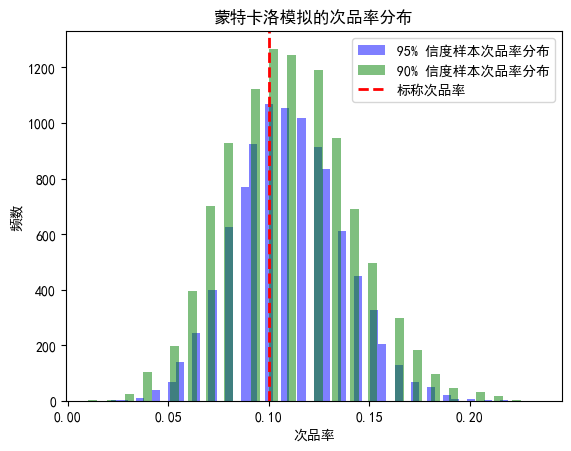

In [36]:
import numpy as np
import scipy.stats as stats

# 定义参数
P0 = 0.1  # 标称次品率
n_simulations = 10000  # 蒙特卡洛模拟的次数
sample_size_95 = 139  # 根据95%信度计算出的样本量
sample_size_90 = 98   # 根据90%信度计算出的样本量
true_defect_rate = 0.11  # 真实的次品率（假设比标称次品率稍高）,可以多次测试

# 模拟抽样过程
def monte_carlo_simulation(n, true_defect_rate, n_simulations):
    """
    蒙特卡洛模拟抽样检测
    """
    results = np.random.binomial(n, true_defect_rate, size=n_simulations) / n
    return results

# 执行蒙特卡洛模拟
results_95 = monte_carlo_simulation(sample_size_95, true_defect_rate, n_simulations)
results_90 = monte_carlo_simulation(sample_size_90, true_defect_rate, n_simulations)

# 计算在不同信度下的次品率分布
mean_rate_95 = np.mean(results_95)
mean_rate_90 = np.mean(results_90)

# 使用95%和90%信度水平进行假设检验
def monte_carlo_decision(simulated_results, P0, alpha):
    """
    根据蒙特卡洛模拟结果进行假设检验
    """
    critical_value = np.percentile(simulated_results, 100 * (1 - alpha))
    if critical_value > P0:
        return "拒收"
    else:
        return "接收"

# 判断是否接收或拒收零件
decision_95 = monte_carlo_decision(results_95, P0, 0.05)
decision_90 = monte_carlo_decision(results_90, P0, 0.10)

print(f"95% 信度下的模拟结果: {decision_95}, 平均次品率: {mean_rate_95:.4f}")
print(f"90% 信度下的模拟结果: {decision_90}, 平均次品率: {mean_rate_90:.4f}")

# 绘制模拟结果的分布图
import matplotlib.pyplot as plt

# 设置中文字体（使用SimHei字体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 重新绘制模拟结果的分布图
plt.hist(results_95, bins=50, alpha=0.5, label='95% 信度样本次品率分布', color='blue')
plt.hist(results_90, bins=50, alpha=0.5, label='90% 信度样本次品率分布', color='green')
plt.axvline(P0, color='red', linestyle='dashed', linewidth=2, label='标称次品率')
plt.legend()
plt.xlabel('次品率')
plt.ylabel('频数')
plt.title('蒙特卡洛模拟的次品率分布')
plt.show()

模拟结果的解释：
95% 信度下，我们更严格地要求次品率不要超过 10% 由于模拟的平均次品率 0.1095 超过了标称次品率，系统决定拒收该批产品。
90% 信度下，虽然信度降低了，但由于模拟的次品率 0.1102 依然高于标称次品率 0.1，系统仍选择拒收。
这表明，当真实的次品率略高于标称次品率时，企业在较高的信度下更倾向于拒收该批次产品。这种情况可能提示企业需要对供应商的零件质量进行更严格的控制，或者采取其他措施降低次品率